# Pymaceuticals Inc.
---

### Analysis

- In this analysis, a total of 248 mice (male 51%, female 49%) who were identified with SCC tumors, received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. Mice were distribuited in a total of 10 different drug regimen groups. For mouse l509, it was necessary 20 days of treatment until the records started showing a positive effect in reducing the volume of tumor, and by the end of this analysis a reduction of 4mm3 in average was perceived for mice being treated with Capomulin. It was also confirmed a correlation between mouse weight and the average tumor volume(p-value 0.84).
 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_mouse_df=pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
study_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [91]:
# Checking the number of mice.
mice_count = study_mouse_df["Mouse ID"].unique()
print(len(mice_count))

249


In [92]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_timepoint = study_mouse_df.duplicated(subset=["Mouse ID","Timepoint"])
unique_duplicated_timepoint=study_mouse_df.loc[duplicated_timepoint, "Mouse ID"].unique()
unique_duplicated_timepoint


array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_ID_data_df = pd.DataFrame(study_mouse_df.loc[study_mouse_df["Mouse ID"]=="g989"])
duplicated_ID_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_mouse_clean_df=study_mouse_df.drop([860,861,862,863,864,865,866,867,868,869,870,871,872])

In [95]:
#Checking the number of mice in the clean DataFrame.
mice_count = study_mouse_clean_df["Mouse ID"].unique()
print(len(mice_count))


248


## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = study_mouse_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = study_mouse_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = study_mouse_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_st_deviation = study_mouse_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = study_mouse_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
mouse_weight = study_mouse_clean_df.groupby(["Drug Regimen"])["Weight (g)"].mean()

study_mouse_summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,"Median Tumor Volume":tumor_median,\
                                    "Tumor Volume Variance":tumor_variance,"Tumor Volume Std. Dev.":tumor_st_deviation,\
                                    "Tumor Volume Std. Err.":tumor_sem})

study_mouse_summary_df 


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = study_mouse_clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean","median","var","std","sem"])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

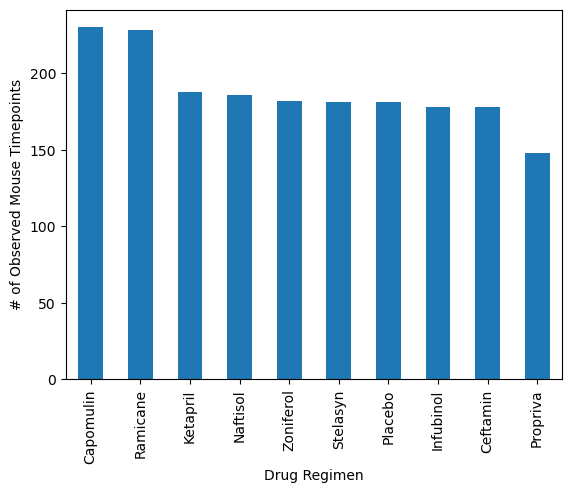

<Figure size 640x480 with 0 Axes>

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_panda=pd.DataFrame({"x_drugs":study_mouse_clean_df["Drug Regimen"].unique(), "y_lines":study_mouse_clean_df["Drug Regimen"].value_counts()})
panda_bar=bar_panda.plot.bar(legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.figure()
plt.show()

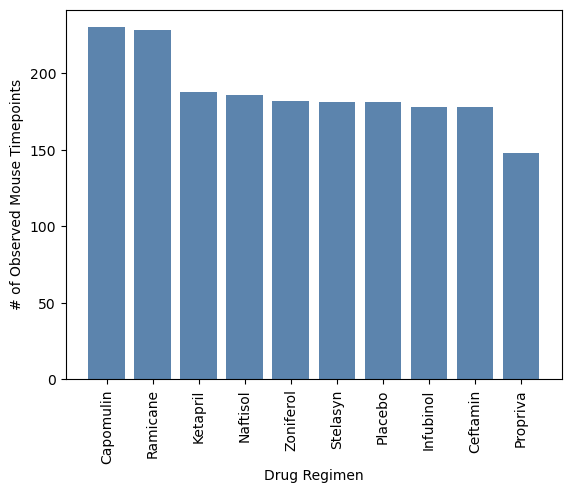

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_drugs = np.arange(len(summary_aggregation.index))
y_lines = study_mouse_clean_df["Drug Regimen"].value_counts()
plt.bar(x_drugs,y_lines, color=(0.2, 0.4, 0.6, 0.8))
plt.xticks(ticks = x_drugs, labels = y_lines.index,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

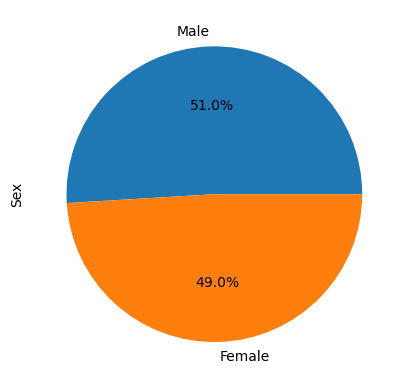

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_panda_df = pd.DataFrame({"labels":("Male","Female"),"data":study_mouse_clean_df["Sex"].value_counts()/(len(study_mouse_clean_df["Sex"]))*100})
pie_panda = pie_panda_df.plot.pie(x="labels",y="data",legend=False,autopct="%1.1f%%")
pie_panda.set_ylabel("Sex",rotation=90)
plt.show()

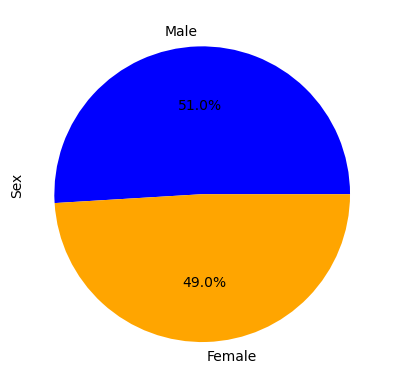

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
data = study_mouse_clean_df["Sex"].value_counts()/(len(study_mouse_clean_df["Sex"]))*100
colors=["blue","orange"]
plt.pie(data,labels=labels,colors=colors,autopct="%1.1f%%")
plt.text(-1.3,0.0,"Sex", rotation=90, ha="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timpoint_df = study_mouse_clean_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_volume_greatest_timepoint = pd.merge(greatest_timpoint_df,study_mouse_clean_df, on=["Mouse ID","Timepoint"], how="left").set_index(["Drug Regimen"]).sort_index()
drug_volume_greatest_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,g316,45,40.159220,2,Female,22,22
Capomulin,s710,45,40.728578,1,Female,1,23
Capomulin,t565,45,34.455298,0,Female,20,17
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,r554,45,32.377357,3,Female,8,17
...,...,...,...,...,...,...,...
Zoniferol,w575,45,68.401286,3,Female,16,28
Zoniferol,c302,45,64.575222,4,Female,10,29
Zoniferol,c264,45,67.942121,2,Female,11,27


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = drug_volume_greatest_timepoint.groupby(["Drug Regimen"]).quantile([.25,.5,.75],numeric_only=True)

for treatment in treatments: 
    check_drug = drug_volume_greatest_timepoint.loc[treatment]
    tumor_volume.append(check_drug['Tumor Volume (mm3)'])

   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lowerq = quartiles["Tumor Volume (mm3)"].loc[(treatment,0.25)]
    upperq = quartiles["Tumor Volume (mm3)"].loc[(treatment,0.75)]
    iqr = upperq-lowerq

    # add subset 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    

    # Determine outliers using upper and lower bounds
    outliers = check_drug['Tumor Volume (mm3)'].loc[(check_drug['Tumor Volume (mm3)'] < lower_bound) | (check_drug['Tumor Volume (mm3)'] > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Drug Regimen
Infubinol    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


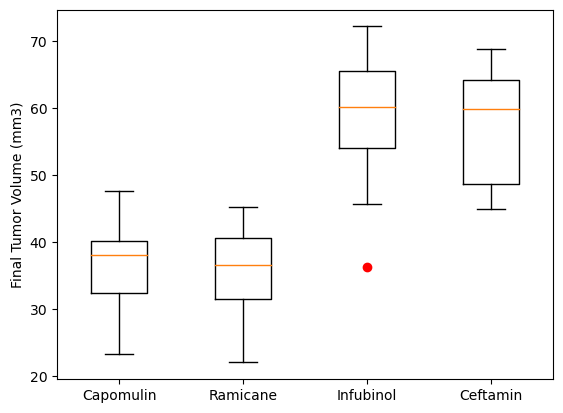

In [104]:
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(tumor_volume,labels=treatments,sym='r')
plt.show()

## Line and Scatter Plots

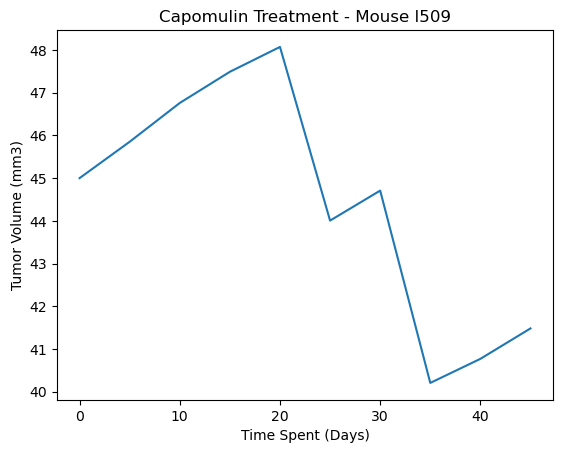

In [105]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#assign values to axis x and y
x_axis= study_mouse_clean_df['Timepoint'].loc[(study_mouse_clean_df['Mouse ID']=='l509')]
y_axis= study_mouse_clean_df['Tumor Volume (mm3)'].loc[(study_mouse_clean_df['Mouse ID']=='l509')]

#give a title to chat and name x axix and y axix
plt.title("Capomulin Treatment - Mouse l509")
plt.xlabel("Time Spent (Days)")
plt.ylabel("Tumor Volume (mm3)")

#create the line chart and show
plt.plot(x_axis, y_axis)
plt.show()

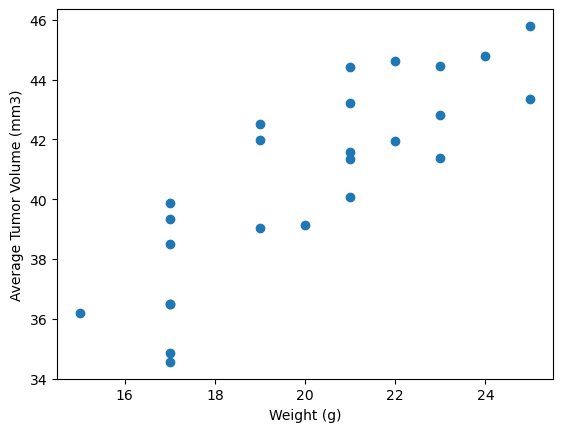

In [106]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#to assign values to variable x and y
scatter_x_axis=study_mouse_clean_df.loc[(study_mouse_clean_df["Drug Regimen"]=="Capomulin")].groupby(["Mouse ID"])["Weight (g)"].mean()
scatter_y_axis=study_mouse_clean_df.loc[(study_mouse_clean_df["Drug Regimen"]=="Capomulin")].groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#to give lables to x and y axis
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#creat scatter plot and show
plt.scatter(scatter_x_axis,scatter_y_axis)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


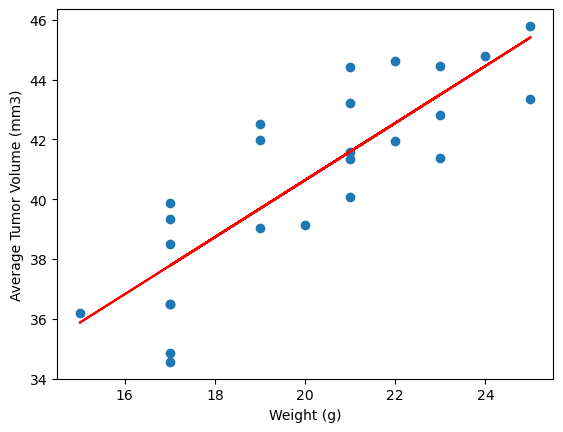

In [107]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(scatter_x_axis,scatter_y_axis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(scatter_x_axis, scatter_y_axis)
regress_values = scatter_x_axis * slope + intercept

plt.scatter(scatter_x_axis, scatter_y_axis)
plt.plot(scatter_x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()